# **Objective**:
Your objective is to develop a robust analysis and recommendation system that assists potential buyers in making informed decisions when selecting properties. This involves preprocessing the dataset, performing exploratory analysis, and building a recommendation engine based on property features and buyer preferences.

# **Dataset Description**:
The dataset comprises the following columns:

* **property_name**: Name or title associated with the property listing.
* **property_type**: Type or category of the property (e.g., apartment, villa, penthouse).
* **society**: Name of the housing society or complex where the property is situated.
* **price**: Selling or listing price of the property.
* **price_per_sqft**: Price per square foot of the property.
* **area**: Estimated area of the property in square units.
* **areaWithType**: Combination of area and property type, providing size and type context.
* **bedRoom**: Number of bedrooms in the property.
* **bathroom**: Number of bathrooms in the property.
* **balcony**: Number of balconies attached to the property.
* **additionalRoom**: Count of extra rooms or spaces in the property.
* **address**: Location details of the property, including city and locality.
* **floorNum**: Floor number of the property within the building.
* **facing**: Direction the property is facing (e.g., north, south, east).
* **agePossession**: Age of the property or years since construction.
* **nearbyLocations**: Landmarks or neighborhoods near the property's location.
* **description**: Detailed description of property features and amenities.
* **furnishDetails**: Level of furnishing in the property (e.g., fully furnished, semi-furnished).
* **features**: Special amenities associated with the property (e.g., pool, security).
* **rating**: Rating or feedback score assigned to the property.

# **Data Preprocessing**:

* Handle missing values, correct data types, and remove duplicates.
* Calculate 'area' based on price and price per square foot.
* Encode categorical variables like property type and facing direction.
* and many more
and lastly Export Cleaned Data


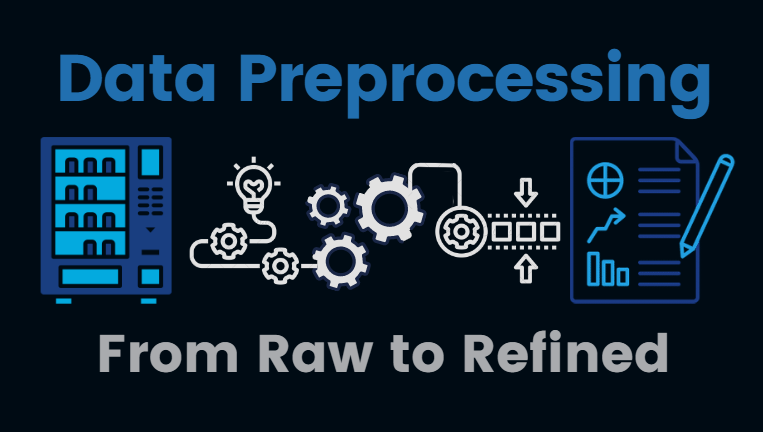

# **Import Basic Libraries**


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
# To modify the display options for DataFrames
# This sets the maximum number of rows and columns to be displayed to "None," which effectively means that pandas will display all rows and columns of a DataFrame when you print it

In [ ]:
df = pd.read_csv('flats.csv')

In [ ]:
# show random Rows
df.sample(5)

,property_name,link,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
2256,3 BHK Flat in Sector 89 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,M3M Soulitude,1.42 Crore,"₹ 9,978/sq.ft.",Carpet area: 1423 (132.2 sq.m.),3 Bedrooms,3 Bathrooms,2 Balconies,NaN,"Sector 89 Gurgaon, Gurgaon, Haryana",3rd of 4 Floors,NaN,Within 6 months,"['Vatika Town Square-INXT', 'Sector 86 Road', ...","Park and club facing, third floor, close to xa...",NaN,"['Intercom Facility', 'Lift(s)', 'Park']","['Environment4 out of 5', 'Lifestyle4 out of 5...",F69673370
2985,3 BHK Flat in Sector 9A Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Jammu and Kashmir Bank Employees CGHS3.7 ★,95 Lac,"₹ 6,129/sq.ft.",Super Built up area 1550(144 sq.m.),3 Bedrooms,3 Bathrooms,2 Balconies,Others,"Sector 9A Gurgaon, Gurgaon, Haryana",5th of 5 Floors,West,5 to 10 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Shri...",We are the proud owners of this 3 bhk apartmen...,"['2 Wardrobe', '4 Fan', '3 Geyser', 'No AC', '...","['Lift(s)', 'Maintenance Staff', 'Park', 'Visi...","['Management4 out of 5', 'Green Area4 out of 5...",E45070641
1580,3 BHK Flat in Sector 85 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,SS The Leaf3.8 ★,1.84 Crore,"₹ 7,641/sq.ft.",Super Built up area 2408(223.71 sq.m.)Carpet a...,3 Bedrooms,4 Bathrooms,3 Balconies,Pooja Room,"Sector 85 Gurgaon, Gurgaon, Haryana",8th of 26 Floors,South-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Cen...","This 3 bhk flat is located in ss the leaf, whi...","['14 Light', '5 AC', 'No Bed', 'No Chimney', '...","['Centrally Air Conditioned', 'Water purifier'...","['Green Area4.5 out of 5', 'Construction4.5 ou...",E69389662
260,2 BHK Flat in Sector 90 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,MRG World Ultimus,50 Lac,"₹ 6,983/sq.ft.",Carpet area: 716 (66.52 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,NaN,"Sector 90 Gurgaon, Gurgaon, Haryana",1st of 14 Floors,North-East,Mar-24,"['Huda Metro Station', 'Aanyaz Mall', 'Sector ...","Best location, beside property 200 bed running...",NaN,"['Lift(s)', 'Maintenance Staff', 'Water Storag...","['Environment4 out of 5', 'Safety5 out of 5', ...",K68195520
937,3 BHK Flat in Sector 104 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,ATS Triumph3.9 ★,1.83 Crore,"₹ 7,991/sq.ft.",Super Built up area 2290(212.75 sq.m.)Built Up...,3 Bedrooms,4 Bathrooms,3+ Balconies,Servant Room,"4102, Sector 104 Gurgaon, Gurgaon, Haryana",10th of 27 Floors,North,1 to 5 Year Old,"['IFFCO Chowk Metro Station', 'The Esplanade M...","Ats triumph in sector-104, gurgaon is a ready-...","['1 Wardrobe', '11 Light', '5 AC', '1 Modular ...","['Centrally Air Conditioned', 'Water purifier'...","['Green Area4 out of 5', 'Construction5 out of...",A66305504


In [ ]:
# shape
df.shape

(3008, 20)

In [ ]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    3008 non-null   object
 1   link             3008 non-null   object
 2   society          3007 non-null   object
 3   price            3007 non-null   object
 4   area             2996 non-null   object
 5   areaWithType     3008 non-null   object
 6   bedRoom          3008 non-null   object
 7   bathroom         3008 non-null   object
 8   balcony          3008 non-null   object
 9   additionalRoom   1694 non-null   object
 10  address          3002 non-null   object
 11  floorNum         3006 non-null   object
 12  facing           2127 non-null   object
 13  agePossession    3007 non-null   object
 14  nearbyLocations  2913 non-null   object
 15  description      3008 non-null   object
 16  furnishDetails   2203 non-null   object
 17  features         2594 non-null   

In [ ]:
# Check for Duplicates
df.duplicated().sum()

0

* No Duplicated values In flats Dataset

In [ ]:
# Check for missing values
df.isnull().sum()

property_name         0
link                  0
society               1
price                 1
area                 12
areaWithType          0
bedRoom               0
bathroom              0
balcony               0
additionalRoom     1314
address               6
floorNum              2
facing              881
agePossession         1
nearbyLocations      95
description           0
furnishDetails      805
features            414
rating              332
property_id           0
dtype: int64

**Here we have to Drop Unneccessary Columns**

In [ ]:
# columns to drop -> property_link, property_id
df.drop(columns={'link','property_id'},inplace=True)

In [ ]:
df.head(2)

,property_name,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,45 Lac,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,Apna Enclave,50 Lac,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."


In [ ]:
# rename columns
df.rename(columns={'area':'price_per_sqft'},inplace=True)
df.head(2)

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,45 Lac,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,Apna Enclave,50 Lac,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."


# **Society**

In [ ]:
df['society'].value_counts()

SS The Leaf3.8 ★                                     73
Tulip Violet4.3 ★                                    40
Shapoorji Pallonji Joyville Gurugram4.0 ★            39
Signature Global Park4.0 ★                           36
Shree Vardhman Victoria3.8 ★                         35
Tulip Violet4.2 ★                                    33
Emaar MGF Emerald Floors Premier3.8 ★                32
Smart World Gems                                     32
Smart World Orchard                                  32
Paras Dews                                           31
DLF The Ultima4.0 ★                                  31
DLF Regal Gardens3.9 ★                               30
Shree Vardhman Flora3.8 ★                            29
M3M Woodshire4.0 ★                                   29
La Vida by Tata Housing                              28
Signature Global Solera3.7 ★                         27
Godrej Nature Plus                                   27
BPTP Terra3.8 ★                                 

In [ ]:
# Society
df['society'].value_counts().shape

(636,)

In [ ]:
import re
# The re module is used for working with regular expressions, which are powerful tools for pattern matching and manipulation of strings.

In [ ]:
df['society']=df['society'].apply(lambda name: re.sub(r'\d+(\.\d+)?\s?★', '', str(name)).strip()).str.lower()

In [ ]:
df['society'].value_counts().shape

(602,)

In [ ]:
df['society'].value_counts()

tulip violet                                     75
ss the leaf                                      74
shapoorji pallonji joyville gurugram             45
dlf new town heights                             38
signature global park                            36
shree vardhman victoria                          35
smart world gems                                 32
emaar mgf emerald floors premier                 32
smart world orchard                              32
paras dews                                       31
dlf the ultima                                   31
dlf regal gardens                                30
m3m woodshire                                    30
shree vardhman flora                             29
la vida by tata housing                          28
godrej nature plus                               27
signature global solera                          27
bptp terra                                       25
emaar gurgaon greens                             25
vatika gurga

In [ ]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,45 Lac,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,50 Lac,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,40 Lac,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47 Crore,"₹ 12,250/sq.ft.",Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,70 Lac,"₹ 5,204/sq.ft.",Super Built up area 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


# **Price**

In [ ]:
df['price'].value_counts()

1.25 Crore          79
1.1 Crore           61
1.4 Crore           60
1.5 Crore           59
1.2 Crore           59
90 Lac              58
1.3 Crore           57
95 Lac              53
2 Crore             51
1.75 Crore          47
1 Crore             46
1.6 Crore           43
1.35 Crore          41
1.55 Crore          40
1.9 Crore           40
75 Lac              38
1.65 Crore          38
1.8 Crore           37
1.7 Crore           37
80 Lac              36
2.2 Crore           34
50 Lac              33
1.15 Crore          33
1.45 Crore          31
85 Lac              31
1.05 Crore          30
2.5 Crore           29
60 Lac              29
40 Lac              29
2.1 Crore           26
45 Lac              26
65 Lac              25
35 Lac              23
2.35 Crore          23
1.85 Crore          23
3 Crore             22
70 Lac              21
55 Lac              20
2.25 Crore          20
3.5 Crore           19
2.4 Crore           18
2.3 Crore           18
30 Lac              17
2.65 Crore 

In [ ]:
df[df['price'] == 'Price on Request']

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
25,5 BHK Flat in Sector 1 Gurgaon,the new people apartments,Price on Request,NaN,Built Up area: 4500 (418.06 sq.m.),5 Bedrooms,1 Bathroom,No Balcony,NaN,"Sector 1, Sector 1 Gurgaon, Gurgaon, Haryana",Ground of 1 Floors,NaN,undefined,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash ...",Best in class property available at sector 1 l...,NaN,NaN,NaN
1644,4 BHK Flat in Sector 50 Gurgaon,ss hibiscus,Price on Request,NaN,Carpet area: 4800 (445.93 sq.m.),4 Bedrooms,4 Bathrooms,3 Balconies,Servant Room,"Sector 50 Gurgaon, Gurgaon, Haryana",7th of 18 Floors,East,5 to 10 Year Old,"['Baani Square', 'SS Plaza', 'Good Earth City ...",4bedroom 4800sq.Ft middle floor apartment avai...,"['4 Fan', '8 Light', 'No AC', 'No Bed', 'No Ch...","['Lift(s)', 'Water purifier', 'Swimming Pool',...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
1972,1 BHK Flat in Sector 31 Gurgaon,raheja atlantis,Price on Request,NaN,Carpet area: 650 (60.39 sq.m.),1 Bedroom,1 Bathroom,1 Balcony,"Pooja Room,Study Room,Servant Room","Yes, Sector 31 Gurgaon, Gurgaon, Haryana",3rd of 15 Floors,East,0 to 1 Year Old,"['Huda Metro Station', 'Reliance Fresh, Indira...",It is my property and good condition and good ...,NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area4 out of 5', 'Construction4 out of..."
2054,2 BHK Flat in Sector 79 Gurgaon,supertech araville,Price on Request,NaN,Built Up area: 1295 (120.31 sq.m.),2 Bedrooms,2 Bathrooms,No Balcony,NaN,"Sector 79, Sector 79 Gurgaon, Gurgaon, Haryana",15th of 15 Floors,NaN,undefined,NaN,"2 bath, unfurnished, 15th floor (Of 18), super...",NaN,NaN,"['Environment4 out of 5', 'Lifestyle3 out of 5..."
2357,2 BHK Flat in Sector 37D Gurgaon,the millennia 2,Price on Request,NaN,Carpet area: 552 (51.28 sq.m.),2 Bedrooms,1 Bathroom,1 Balcony,NaN,"Sector 37D Gurgaon, Gurgaon, Haryana",13rd of 13 Floors,NaN,undefined,"['Shri Balaji Hospital and Trauma Center', 'Sh...","1 bath, unfurnished, 13th floor (Of 13), at se...",NaN,NaN,"['Environment4 out of 5', 'Lifestyle4 out of 5..."
2522,2 BHK Flat in Sector 95A Gurgaon,the roselia 2,Price on Request,NaN,Carpet area: 593 (55.09 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,NaN,"Sector 95a, Pataudi Road, Sector 95A Gurgaon, ...",14th of 14 Floors,NaN,undefined,NaN,Best in class property available at sector 95a...,NaN,NaN,"['Environment5 out of 5', 'Lifestyle4.5 out of..."
2549,3 BHK Flat in Sector-2 Sohna,supertech hilltown,Price on Request,NaN,Built Up area: 1720 (159.79 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,NaN,"Sohna Sector 2,gurgaon, Sector-2 Sohna, Gurgao...",4th of 4 Floors,North-East,undefined,NaN,"3 bath, unfurnished, 4th floor (Of 4), overloo...",NaN,NaN,NaN
2640,2 BHK Flat in Sector 95A Gurgaon,the roselia 2,Price on Request,NaN,Carpet area: 593 (55.09 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,NaN,"Sector 95a, Pataudi Road, Sector 95A Gurgaon, ...",14th of 14 Floors,NaN,undefined,NaN,Best in class property available at sector 95a...,NaN,NaN,"['Environment5 out of 5', 'Safety5 out of 5', ..."
2950,3 BHK Flat in Sector 104 Gurgaon,godrej summit,Price on Request,NaN,Super Built up area 1647(153.01 sq.m.)Carpet a...,3 Bedrooms,3 Bathrooms,3 Balconies,NaN,"1402, Sector 104 Gurgaon, Gurgaon, Haryana",14th of 17 Floors,NaN,1 to 5 Year Old,"['MG Road Metro Station', 'The Esplanade Mall'...",We are the proud owners of this 3 bhk apartmen...,[],"['Intercom Facility', 'Lift(s)', 'Maintenance ...","['Management3 out of 5', 'Green Area4.5 out of..."
2963,4 BHK Flat in Gwal Pahari,krrish provence estate,Price on Request,NaN,Built Up area: 5800 (538.84 sq.m.),4 Bedrooms,5 Bathrooms,1 Balcony,NaN,"Gwal Pahari, Gurgaon, Haryana",17th of 24 Floors,NaN,Under Construction,"['Tniy Toons School', 'Pathways School Gurgoan...",Residential apartment for sell.Located on 17th...,NaN,NaN,NaN


In [ ]:
df = df[df['price'] != 'Price on Request']

In [ ]:
df.sample(5)

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
212,2 BHK Flat in Sector 99A Gurgaon,raheja vanya,59 Lac,"₹ 3,975/sq.ft.",Super Built up area 1252.13(116.33 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Others,"Flat No. C-014, 1st Floor, Sector 99A Gurgaon,...",1st of 19 Floors,East,Dec-23,"['The Esplanade Mall', 'Dwarka Expy', 'Suncity...",Beautiful 2 bhk apartment available on dwarka ...,"['3 Fan', '1 Exhaust Fan', '1 Modular Kitchen'...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment4 out of 5', 'Safety3 out of 5', ..."
2631,3 BHK Flat in Sector 70 Gurgaon,shree vardhman victoria,1.9 Crore,"₹ 9,743/sq.ft.",Super Built up area 1950(181.16 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,"Servant Room,Others,Store Room,Pooja Room","1001 Tower F, 10th Floor, Sector 70 Gurgaon, G...",10th of 13 Floors,North-East,0 to 1 Year Old,"['Airia Mall', 'Golf Course Extn Road', 'Sohna...",The property is located in sector-70 gurgaon. ...,NaN,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...","['Green Area5 out of 5', 'Amenities4.5 out of ..."
1090,3 BHK Flat in Sector 82 Gurgaon,vatika the seven lamps,1.37 Crore,"₹ 8,753/sq.ft.",Super Built up area 2160(200.67 sq.m.)Built Up...,3 Bedrooms,3 Bathrooms,3 Balconies,"Study Room,Servant Room,Pooja Room","1101, Sector 82 Gurgaon, Gurgaon, Haryana",11st of 16 Floors,South,1 to 5 Year Old,"['SS Omnia Mall', 'Golf Course Ext Rd', 'Knowl...",This lovely 3 bhk apartment/flat in sector 82 ...,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Ge...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area5 out of 5', 'Construction5 out of..."
1953,3 BHK Flat in Sector 89 Gurgaon,m3m soulitude,1.3 Crore,"₹ 8,700/sq.ft.",Super Built up area 1500(139.35 sq.m.)Carpet a...,3 Bedrooms,3 Bathrooms,2 Balconies,Others,"Sector 89 Gurgaon, Gurgaon, Haryana",1st of 4 Floors,NaN,Within 6 months,"['Vatika Town Square-INXT', 'Sector 86 Road', ...",Its a building located away from the bundle of...,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
2890,3 BHK Flat in Sector 92 Gurgaon,raheja navodaya,85 Lac,"₹ 5,407/sq.ft.",Super Built up area 1572(146.04 sq.m.),3 Bedrooms,3 Bathrooms,No Balcony,NaN,"No-31008, Sector 92 Gurgaon, Gurgaon, Haryana",Ground of 16 Floors,East,1 to 5 Year Old,"['NH8', 'Dwarka Expressway', 'IMT Manesar', 'Y...",Residential apartment for sell.The property ha...,"['2 Wardrobe', '2 Fan', '2 Light', 'No AC', 'N...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Management4 out of 5', 'Green Area5 out of 5..."


In [ ]:
def treat_price(x):
    if type(x) == float:
        return x
    else:
        if x[1] == 'Lac':
            return round(float(x[0])/100,2)
        else:
            return round(float(x[0]),2)

# It convert price value in equal unit(Crore)

In [ ]:
df['price'] = df['price'].str.split(' ').apply(treat_price)

<ipython-input-24-45c08249b2fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.split(' ').apply(treat_price)


In [ ]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,"₹ 12,250/sq.ft.",Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,"₹ 5,204/sq.ft.",Super Built up area 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


# **price_per_sqft**

In [ ]:
df['price_per_sqft'].value_counts

<bound method IndexOpsMixin.value_counts of 0         ₹ 5,000/sq.ft.
1         ₹ 7,692/sq.ft.
2         ₹ 6,722/sq.ft.
3        ₹ 12,250/sq.ft.
4         ₹ 5,204/sq.ft.
5         ₹ 6,269/sq.ft.
6        ₹ 13,333/sq.ft.
7         ₹ 7,860/sq.ft.
8         ₹ 8,148/sq.ft.
9        ₹ 16,885/sq.ft.
10        ₹ 9,767/sq.ft.
11        ₹ 5,587/sq.ft.
12        ₹ 6,940/sq.ft.
13        ₹ 6,859/sq.ft.
14        ₹ 5,384/sq.ft.
15       ₹ 16,859/sq.ft.
16       ₹ 14,084/sq.ft.
17       ₹ 11,475/sq.ft.
18                   NaN
19       ₹ 10,476/sq.ft.
20        ₹ 9,156/sq.ft.
21        ₹ 8,604/sq.ft.
22        ₹ 7,796/sq.ft.
23        ₹ 9,135/sq.ft.
24       ₹ 12,855/sq.ft.
26        ₹ 7,910/sq.ft.
27       ₹ 18,331/sq.ft.
28       ₹ 24,300/sq.ft.
29        ₹ 5,600/sq.ft.
30       ₹ 12,784/sq.ft.
31       ₹ 26,936/sq.ft.
32       ₹ 10,156/sq.ft.
33        ₹ 7,194/sq.ft.
34        ₹ 6,538/sq.ft.
35        ₹ 5,769/sq.ft.
36        ₹ 6,950/sq.ft.
37        ₹ 8,866/sq.ft.
38        ₹ 5,403/sq.ft.
39    

In [ ]:
df['price_per_sqft'] = df['price_per_sqft'].str.split('/').str.get(0).str.replace('₹','').str.replace(',','').str.strip().astype('float')

In [ ]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


# **bedRoom**

In [ ]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


In [ ]:
df['bedRoom'].value_counts()

3 Bedrooms    1437
2 Bedrooms     944
4 Bedrooms     478
1 Bedroom      104
5 Bedrooms      31
6 Bedrooms       3
Name: bedRoom, dtype: int64

In [ ]:
df[df['bedRoom'].isnull()]

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating


In [ ]:
df = df[~df['bedRoom'].isnull()]

In [ ]:
df['bedRoom'] = df['bedRoom'].str.split(' ').str.get(0).astype('int')

In [ ]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


# **bathroom**




In [ ]:
df['bathroom'].value_counts()

2 Bathrooms    1044
3 Bathrooms     989
4 Bathrooms     636
5 Bathrooms     169
1 Bathroom      112
6 Bathrooms      42
7 Bathrooms       5
Name: bathroom, dtype: int64

In [ ]:
df['bathroom'].isnull().sum()

0

In [ ]:
df['bathroom']=df['bathroom'].str.split(' ').str.get(0).astype('int')

In [ ]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


# **Balconies**

In [ ]:
df['balcony'].isnull().sum()

0

In [ ]:
df['balcony'].value_counts()

3 Balconies     974
3+ Balconies    862
2 Balconies     749
1 Balcony       315
No Balcony       97
Name: balcony, dtype: int64

In [ ]:
df['balcony'] = df['balcony'].str.split(' ').str.get(0).str.replace('No','0')

In [ ]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


# **additionalRoom**

In [ ]:
df['additionalRoom'].value_counts()

Servant Room                                     629
Study Room                                       232
Others                                           179
Pooja Room                                       132
Study Room,Servant Room                           81
Store Room                                        76
Pooja Room,Servant Room                           60
Servant Room,Others                               52
Servant Room,Pooja Room                           30
Study Room,Others                                 27
Pooja Room,Study Room,Servant Room,Others         25
Pooja Room,Study Room,Servant Room                24
Servant Room,Store Room                           19
Pooja Room,Study Room                             13
Pooja Room,Study Room,Servant Room,Store Room     12
Study Room,Pooja Room                              8
Servant Room,Study Room                            8
Study Room,Servant Room,Store Room                 7
Pooja Room,Store Room                         

In [ ]:
df['additionalRoom'].isnull().sum()

1305

In [ ]:
df['additionalRoom'].fillna('Not available',inplace=True)

In [ ]:
df['additionalRoom'] = df['additionalRoom'].str.lower()

In [ ]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


# **floorNum**

In [ ]:
df['floorNum']

0              4th   of 4 Floors
1              1st   of 3 Floors
2            12nd   of 14 Floors
3              2nd   of 4 Floors
4              5th   of 8 Floors
5              3rd   of 3 Floors
6             5th   of 25 Floors
7            14th   of 27 Floors
8              2nd   of 3 Floors
9            31st   of 40 Floors
10             1st   of 4 Floors
11            4th   of 13 Floors
12            4th   of 15 Floors
13            3rd   of 20 Floors
14           13rd   of 13 Floors
15           25th   of 25 Floors
16            Ground of 1 Floors
17           Ground of 14 Floors
18           11st   of 14 Floors
19           12nd   of 13 Floors
20             4th   of 4 Floors
21           11st   of 22 Floors
22             4th   of 4 Floors
23           Ground of 14 Floors
24           10th   of 25 Floors
26             3rd   of 3 Floors
27           20th   of 20 Floors
28            5th   of 17 Floors
29            4th   of 12 Floors
30             4th   of 4 Floors
31        

In [ ]:
df['floorNum'].isnull().sum()


2

In [ ]:
df[df['floorNum'].isnull()]

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
181,3 BHK Flat in Dwarka Expressway Gurgaon,experion heartsong,1.08,6150.0,Built Up area: 1758 (163.32 sq.m.),3,3,0,not available,"604, Tower B-3, 6th Floor,Sector 108, Dwarka E...",NaN,NaN,Under Construction,NaN,A property by one of the most reputed builders...,[],NaN,NaN
2766,2 BHK Flat in Sector 78 Gurgaon,nan,0.60,3692.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,not available,"Gurgaon, Sector 78 Gurgaon, Gurgaon, Haryana",NaN,NaN,Under Construction,NaN,The property is under construction it's by rah...,[],NaN,"['Safety4 out of 5', 'Lifestyle4 out of 5', 'E..."


In [ ]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


In [ ]:
df['floorNum'] = df['floorNum'].str.split(' ').str.get(0).replace('Ground','0').str.replace('Basement','-1').str.replace('Lower','0').str.extract(r'(\d+)')

In [ ]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


# **facing**

In [ ]:
df['facing'].value_counts()

North-East    505
East          490
North         301
South         203
West          183
North-West    162
South-East    144
South-West    135
Name: facing, dtype: int64

In [ ]:
df['facing'].isnull().sum()

874

In [ ]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


In [ ]:
df['facing'].fillna('NA',inplace=True)

In [ ]:
df['facing'].value_counts()

NA            874
North-East    505
East          490
North         301
South         203
West          183
North-West    162
South-East    144
South-West    135
Name: facing, dtype: int64

In [ ]:
df.insert(loc=4,column='area',value=round((df['price']*10000000)/df['price_per_sqft']))

In [ ]:
df.insert(loc=1,column='property_type',value='flat')

In [ ]:
df.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,flat,maa bhagwati residency,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,flat,apna enclave,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,flat,tulsiani easy in homes,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12,NA,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,flat,smart world orchard,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2,NA,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,flat,parkwood westend,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5,NA,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 3007
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    2997 non-null   object 
 1   property_type    2997 non-null   object 
 2   society          2997 non-null   object 
 3   price            2996 non-null   float64
 4   price_per_sqft   2996 non-null   float64
 5   area             2996 non-null   float64
 6   areaWithType     2997 non-null   object 
 7   bedRoom          2997 non-null   int64  
 8   bathroom         2997 non-null   int64  
 9   balcony          2997 non-null   object 
 10  additionalRoom   2997 non-null   object 
 11  address          2991 non-null   object 
 12  floorNum         2995 non-null   object 
 13  facing           2997 non-null   object 
 14  agePossession    2996 non-null   object 
 15  nearbyLocations  2906 non-null   object 
 16  description      2997 non-null   object 
 17  furnishDetails

In [ ]:
df.shape

(2997, 20)

In [ ]:
df.to_csv('flats_cleaned.csv',index=False)